'''
**scikit-learn의 perceptron 실습**

1.코드 흐름
(1) (데이터 측면) 데이터 불러오기.

(2) (데이터 측면) 불러온 데이터를 훈련데이터와 테스트 데이터로 구분.

(3) (모델 측면) sklearn 라이브러리의 퍼셉트론 모델 불러오기.

(4) (학습 과정) 모델 학습.

(5) (성능 평가) 테스트 데이터를 이용한 모델의 성능 평가 및 시각화.
'''

'''
**데이터 설명**

scikit-learn에서 제공하는 필기체 숫자 데이터를 활용. 해당 데이터는 0부터 9까지 
총 10개의 숫자의 필기체 이미지를 수집한 것으로 총 1797개의 이미지로 구성되어 있으며,
개별 이미지는 8X8=64개의 특성으로 표시됨. 개별 특성은 픽셀을 의미하며 0-16까지의 
정수값이 부여됨.

퍼셉트론은 학습을 통해 0 - 9의 숫자에 대한 필기체 이미지를 인식하여 주어진 이미지의
소속 클래스(숫자)를 예측하는 **분류** 작업을 수행.
'''

In [9]:
'''
**모델의 학습과 예측**

train_test_split을 이용하여 훈련용 데이터와 테스트용 데이터를 확보한 후 fit() 명령으로 
모델을 학습하고, predict() 명령으로 예측 작업을 수행.
'''

'\n**모델의 학습과 예측**\n\ntrain_test_split을 이용하여 훈련용 데이터와 테스트용 데이터를 확보한 후 fit() 명령으로 \n모델을 학습하고, predict() 명령으로 예측 작업을 수행.\n'

'''
**분류 성능 평가와 시각화**

1."classification_report"

sklearn.metrics 패키지에서 제공하는 기능으로 precision, recall, f1-score 등 다양한 
측도를 이용하여 클래스 별로 분류 성능을 확인할 수 있게 해줌(개별 측도의 자세한 내용은 로지스틱 회귀의 관련 내용 참고).

2.Confusion matrix

학습 모델의 분류 성능을 시각적으로 확인할 수 있게 해줌. 특히 목표 클래스(예를 들어 숫자 3에 해당하는 테스트 인스턴스에 대하여 모델이 정확하게 예측한 이미지의 수, 잘못 예측한 이미지들의 경우 클래스(숫자) 별로 잘못 예측한 이미지의 숫자를 표시하여 모델의 분류 성능을 한 눈에 파악할 수 있게 해 줌. 아래 코드셀을 실행하면 숫자 1의 경우 총 42개의 이미지 중 41개를 정확하게 예측하였으며, 1개는 4로 예측하였음을 알 수 있음.
'''

In [10]:
#scikit-learn 설치(anaconda prompt에서 설치)
!pip install scikit-learn

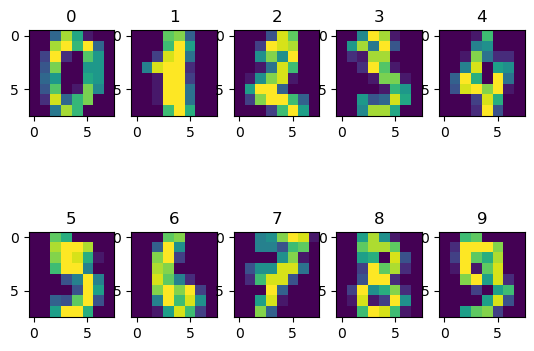

In [11]:
from sklearn.datasets import load_digits      # 학습 데이터 불러오기
from sklearn.linear_model import Perceptron   # 퍼셉트론 모델 불러오기
from matplotlib import pyplot as plt          # 데이터 시각화용 라이브러리

# 학습 데이터를 로딩한 후, X(특징벡터), y(클래스 레이블)로 구분
X, y = load_digits(return_X_y=True)

rows = 2; cols = 5 # 시각화를 위한 행과 열의 개수 설정
fig = plt.figure() # 시각화를 위한 Figure 객체 생성
for i in range(10): # 0부터 9까지의 숫자를 이미지로 시각화
  ax = fig.add_subplot(rows, cols, i+1) # 서브플롯 추가
  ax.imshow(X[i].reshape(8,8)) # 이미지 데이터 형태로 변환하여 출력
  ax.set_title(str(i)) # 서브플롯 제목 설정
plt.show() # 시각화 출력

In [12]:
from sklearn.model_selection import train_test_split# 데이터 분할을 위한 라이브러리

X, y = load_digits(return_X_y=True) # X(특징벡터), y(클래스 레이블)의 훈련데이터로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1) # 테스트 데이터 비율을 25%로 설정, 랜덤 시드 고정


In [13]:
# 퍼셉트론 모델을 사용할 개체(clf)를 생성

clf = Perceptron(tol=1e-3, random_state=0)  
clf.fit(X_train, y_train)                  # 퍼셉트론 모델 학습


Perceptron()

In [14]:
# 테스트 데이터에 대하여 결과 예측

y_pred = clf.predict(X_test)  

In [15]:
from sklearn.metrics import classification_report # 분류 모델 성능 평가를 위한 라이브러리

target_names = ['digit 0', 'digit 1', 'digit 2', 'digit 3', 'digit 4', # 각 클래스에 대한 이름 정의
                'digit 5', 'digit 6', 'digit 7', 'digit 8', 'digit 9']
print(classification_report(y_test, y_pred, target_names=target_names)) # 분류 결과 보고서 출력

# 참값(y_test)과 예측값(y_pred)을 대상으로 classification_report를 생성함에 주의

              precision    recall  f1-score   support

     digit 0       1.00      1.00      1.00        53
     digit 1       0.98      0.98      0.98        42
     digit 2       0.91      0.98      0.94        41
     digit 3       0.98      0.96      0.97        52
     digit 4       0.98      1.00      0.99        47
     digit 5       0.91      1.00      0.95        39
     digit 6       1.00      1.00      1.00        43
     digit 7       1.00      0.98      0.99        48
     digit 8       1.00      0.81      0.90        37
     digit 9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



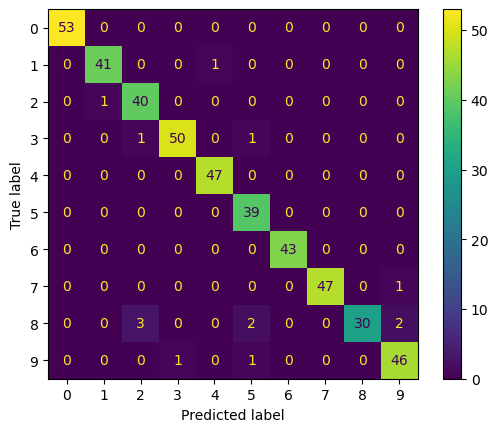

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # 혼동 행렬 및 시각화를 위한 라이브러리

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) # 테스트 데이터와 예측 결과를 바탕으로 혼동 행렬 계산
disp = ConfusionMatrixDisplay(confusion_matrix=cm, # 혼동 행렬 디스플레이 객체 생성
                              display_labels=clf.classes_)
disp.plot() # 혼동 행렬 시각화
plt.show() # 시각화 결과 출력
